### import os for  operating system operations e.g., creating a folder

In [1]:
import os

### Tensorflow and keras are two packages for creating neural network models.

In [2]:

import tensorflow as tf
from tensorflow import keras

### For splitting our dataset into training and test set

In [3]:

from sklearn.model_selection import train_test_split

### print tensorflow (TF) version. Make sure you have at least tensorflow 2.1.0

In [4]:

print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.6.0


In [5]:
import pathlib # for processing a path e.g c:\documents\files\testset.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data frame for the data.
import seaborn as sns # plotting.

### Read dataset

In [6]:

dataset = pd.read_csv('dataset2.csv')

### display dataset

In [7]:
true_values = dataset['WIND-DIRECTION']
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,NaN,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,NaN,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,NaN,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,NaN,43,1010.5
4,May-95,36.8,25.7,155,3.0,NaN,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


### dataset characteristics

In [8]:

dataset.describe()

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
count,318.000000,318.000000,318.000000,318.000000,66.000000,318.000000,318.000000
mean,35.168868,23.039937,165.679245,3.449686,48.207576,53.556604,1011.990566
std,3.219431,3.183020,54.287681,1.456645,16.390328,21.502584,3.587883
min,28.500000,13.900000,58.000000,0.000000,18.900000,11.000000,1002.300000
25%,32.200000,21.000000,120.000000,2.225000,33.300000,32.000000,1010.400000
50%,35.000000,23.600000,163.500000,3.000000,47.600000,54.000000,1013.200000
75%,37.300000,25.000000,204.750000,4.000000,61.350000,75.000000,1014.300000
max,41.900000,29.400000,307.000000,12.000000,98.300000,85.000000,1036.000000


### Check for null and NaN values

In [9]:

dataset.isna().sum()

DATE                   113
MAXIMUM-TEMPERATURE      0
MINIMUM-TEMPERATURE      0
WIND-DIRECTION           0
WIND-SPEED               0
WIND-RUN               252
RELATIVE-HUMIDITY        0
AIR-PRESSURE             0
dtype: int64

In [10]:
median =dataset['WIND-RUN'].median()
median
dataset["WIND-RUN"].fillna(median, inplace=True)

### copy dataset

In [11]:
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,47.6,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,47.6,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,47.6,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,47.6,43,1010.5
4,May-95,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


In [12]:

df = dataset[:]

### remove the date column

In [13]:

del df['DATE']

In [14]:
df

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,33.3,16.4,73,2.0,47.6,27,1014.5
1,35.9,18.6,123,3.0,47.6,23,1013.7
2,40.5,25.0,191,3.0,47.6,32,1009.1
3,40.1,27.2,196,4.0,47.6,43,1010.5
4,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...
313,36.0,22.4,170,3.4,63.7,26,1006.9
314,39.7,26.1,220,2.1,73.7,35,1005.6
315,39.7,28.8,200,4.6,84.2,65,1002.6
316,35.6,25.3,130,2.6,98.3,75,1005.4


In [15]:
print(f'Number of rows/example and columns in the dataset: {df.shape}')

Number of rows/example and columns in the dataset: (318, 7)


### Summary of information on the dataset.

In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MAXIMUM-TEMPERATURE  318 non-null    float64
 1   MINIMUM-TEMPERATURE  318 non-null    float64
 2   WIND-DIRECTION       318 non-null    int64  
 3   WIND-SPEED           318 non-null    float64
 4   WIND-RUN             318 non-null    float64
 5   RELATIVE-HUMIDITY    318 non-null    int64  
 6   AIR-PRESSURE         318 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 17.5 KB


### Split the data into train/test splits

#### Split the data into 60% train and 40% test (later will divide the test to test and validate)

In [17]:

train_dataset, temp_test_dataset = train_test_split(df, test_size=0.4)

print( train_dataset.shape)
print( temp_test_dataset.shape)

(190, 7)
(128, 7)


### Split the test_dataset dataframe to 50% test and 50% validation.

In [18]:

test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)
print(test_dataset.shape)
print(valid_dataset.shape)

(64, 7)
(64, 7)


In [19]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f"Train dataset      : {train_dataset.shape}")
print(f"Test dataset       : {test_dataset.shape}")
print(f"Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train dataset      : (190, 7)
Test dataset       : (64, 7)
Validation dataset : (64, 7)


## Plot the relationship between each two variables to spot anything incorrect.

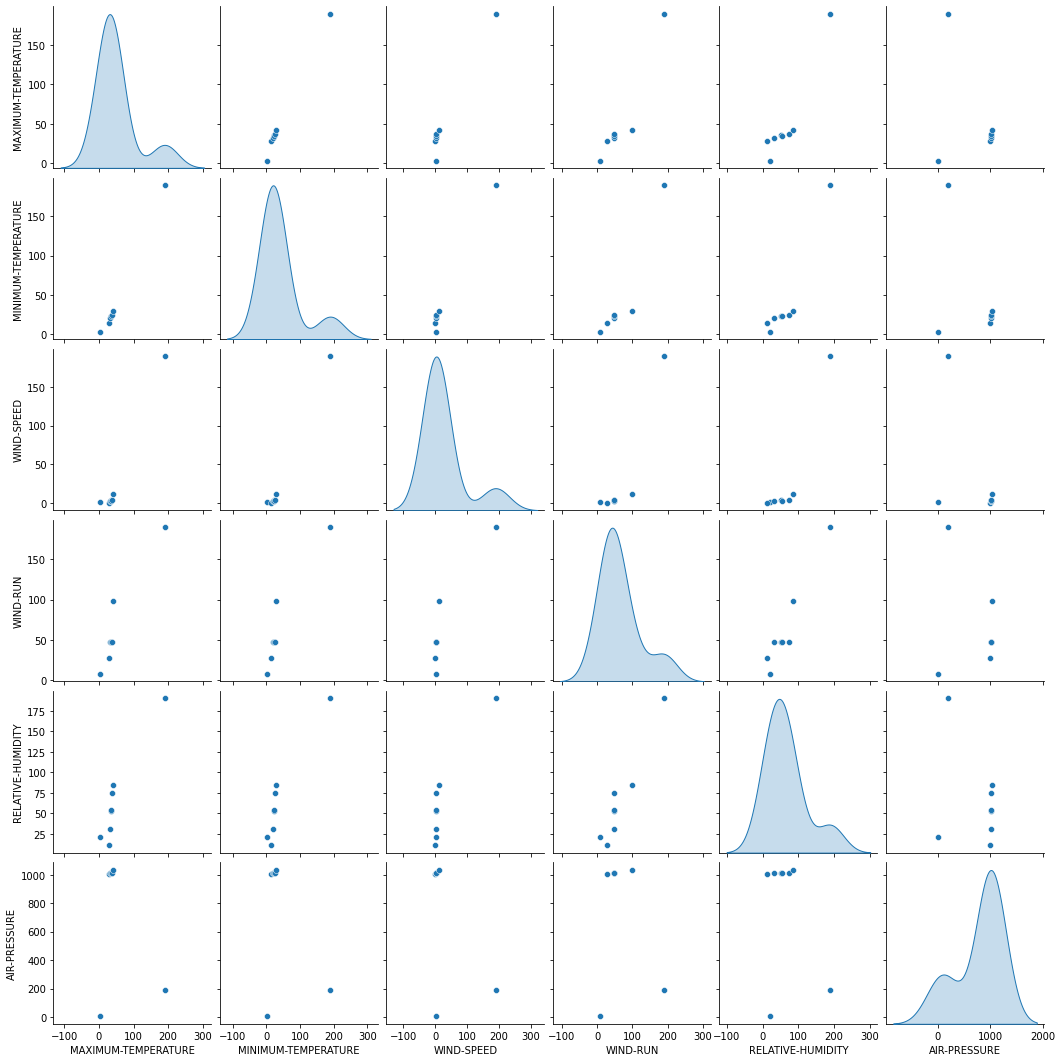

In [20]:

train_stats = train_dataset.describe()
train_stats.pop("WIND-DIRECTION")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

### Statistics on the train dataset to make sure it in a good shape

In [21]:

train_stats = train_dataset.describe()
wind_direction=train_stats.pop("WIND-DIRECTION")
train_stats = train_stats.transpose()
#train_stats
wind_direction

count    190.000000
mean     164.957895
std       56.195881
min       58.000000
25%      120.000000
50%      161.500000
75%      207.750000
max      307.000000
Name: WIND-DIRECTION, dtype: float64

## The label is "WIND-DIRECTION"

In [22]:
train_labels = train_dataset.pop('WIND-DIRECTION')
test_labels = test_dataset.pop('WIND-DIRECTION')
valid_labels = valid_dataset.pop('WIND-DIRECTION')

## Data Normalization/Scaling

### define a function to normalize the data set.

In [23]:


from sklearn.preprocessing import MinMaxScaler

def norm(x):
    cols_to_scale= ['MAXIMUM-TEMPERATURE','MINIMUM-TEMPERATURE','WIND-SPEED','RELATIVE-HUMIDITY','WIND-RUN','AIR-PRESSURE']
    scaler = MinMaxScaler()
    x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])
    return x

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [24]:
print(f'Train/Test/Validate splits: ')
print(f'Train       : {normed_train_data.shape} ')
print(f'Test        : {normed_test_data.shape} ')
print(f'Validate    : {normed_valid_dataset.shape} ')

print(f'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape}')
print(f'Test Labels  : {test_labels.shape}')
print(f'Test Labels  : {valid_labels.shape}')

Train/Test/Validate splits: 
Train       : (190, 6) 
Test        : (64, 6) 
Validate    : (64, 6) 
Train/Test/Validate labels: 
Train Labels : (190,)
Test Labels  : (64,)
Test Labels  : (64,)


## show a sample of the data after normalized

In [25]:

normed_train_data.head(10)

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
271,0.203008,0.658065,0.183333,0.402525,0.945946,0.189911
38,0.789474,0.690323,0.333333,0.288920,0.148649,0.296736
284,0.225564,0.664516,0.191667,0.479663,0.905405,0.169139
136,0.624060,0.709677,0.333333,0.288920,0.756757,0.311573
151,0.187970,0.625806,0.166667,0.288920,1.000000,0.356083
176,0.255639,0.645161,0.333333,0.288920,0.959459,0.382789
108,0.451128,0.316129,0.250000,0.288920,0.283784,0.314540
283,0.203008,0.658065,0.150000,0.051893,0.945946,0.172107
244,0.819549,0.741935,0.416667,0.288920,0.729730,0.302671
310,0.669173,0.496774,0.100000,0.077139,0.283784,0.139466


## Build a Neural Network Model

### We declared a function for creating a model.

## import NN and other components.

In [26]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers

In [27]:
def model_multilayer_perceptron_with_eight_hidden_layer():
      model = Sequential()
     # The model so far is empty. It can be constructed by adding layers and compilation.
     # This Keras model with a single hidden layers.
        
     # Input Layer with 32 Neurons
      model.add(Dense(32, input_shape =(normed_train_data.shape[1],)))
 
      model.add(Dense(32, Activation('relu'))) # Hidden layer 1
      model.add(Dropout(0.5))
      model.add(Dense(64, Activation('relu'))) # Hidden layer 2
      model.add(Dropout(0.5))
      model.add(Dense(72, Activation('relu'))) # Hidden layer 3
      model.add(Dropout(0.5))
      model.add(Dense(80, Activation('relu'))) # Hidden layer 4
      model.add(Dropout(0.5))
      model.add(Dense(32, Activation('relu'))) # Hidden layer 5
      model.add(Dense(64, Activation('relu'))) # Hidden layer 6
      model.add(Dense(72, Activation('relu'))) # Hidden layer 7
      model.add(Dense(80, Activation('relu'))) # Hidden layer 8
     
      model.add(Dense(1))  # Output layer => output dimension = 1
    
      learning_rate = 0.001
    
      optimizer = optimizers.RMSprop(learning_rate)
  
      model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse','mape']) 
      return model

In [28]:
model = model_multilayer_perceptron_with_eight_hidden_layer()
print('Here is a summary of this model: ')


model.summary()


Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 72)                4680      
_________________________________________________________________
dropout_2 (Dropout)   

## Training the model we built above.

In [29]:
# Tensorflow utils packages.
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [30]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction_8_layers_n_dropout.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

In [31]:
%%time

EPOCHS = 1000
batch_size = 6

model = model_multilayer_perceptron_with_eight_hidden_layer()
print('Here is a summary of this model: ')
model.summary()

with tf.device('/CPU:0'):
    history = model.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 72)                4680      
_________________________________________________________________
dropout_6 (Dropout) 

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.............................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


................
Epoch: 100, loss:7338.1890,  mae:72.5167,  mape:57.4583,  mse:7338.1890,  val_loss:2789.1011,  val_mae:43.3634,  val_mape:26.1926,  val_mse:2789.1011,  
.....................................................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


...........................................
Epoch: 200, loss:926.1874,  mae:22.2888,  mape:15.6058,  mse:926.1874,  val_loss:2816.1973,  val_mae:43.6862,  val_mape:25.8645,  val_mse:2816.1973,  
...............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.........................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


..........................................................
Epoch: 300, loss:6820.3306,  mae:68.2624,  mape:37.4535,  mse:6820.3306,  val_loss:3455.5103,  val_mae:47.6435,  val_mape:26.0708,  val_mse:3455.5103,  
....................................................................................................
Epoch: 400, loss:2263.4475,  mae:43.3808,  mape:29.9522,  mse:2263.4475,  val_loss:4663.3359,  val_mae:56.2967,  val_mape:29.4732,  val_mse:4663.3359,  
....................................................................................................
Epoch: 500, loss:1558.4399,  mae:34.4819,  mape:25.1224,  mse:1558.4399,  val_loss:6094.2495,  val_mae:65.4652,  val_mape:33.7958,  val_mse:6094.2495,  
....................................................................................................
Epoch: 600, loss:2746.9980,  mae:42.3723,  mape:26.4492,  mse:2746.9980,  val_loss:5704.4692,  val_mae:63.0154,  val_mape:32.4125,  val_mse:5704.4692,  
..........................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_8_layers_n_dropout.ckpt\assets


.................................................................................................Wall time: 3min 54s


In [32]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,1897.374146,34.866032,1897.374146,16.087820,3996.914551,51.047733,3996.914551,26.578081,995
996,3168.444580,52.500111,3168.444580,39.231762,5180.752441,59.019737,5180.752441,30.140190,996
997,2486.975830,44.618351,2486.975830,30.389664,4557.929688,54.880627,4557.929688,28.222656,997
998,4148.158691,52.135845,4148.158691,56.596607,7386.813965,72.497200,7386.813965,36.998089,998
999,5191.742676,60.508881,5191.742676,30.929245,5287.146973,59.653759,5287.146973,30.433969,999


In [33]:
# Test the model after training
example_result_test= model.predict(normed_test_data)

In [34]:

example_result_train= model.predict(normed_train_data)

## Compare the predicted values with the actual values

In [35]:
print('Predicted Values')
print(example_result_test[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[119.20597 ]
 [111.580574]
 [ 99.78113 ]
 [ 99.59281 ]
 [123.60221 ]
 [101.97406 ]
 [ 99.73579 ]
 [104.72843 ]
 [114.92361 ]
 [104.296776]]

Actual Values
146
190
101
123
234
119
 72
170
170
100


In [36]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,1897.374146,34.866032,1897.374146,16.087820,3996.914551,51.047733,3996.914551,26.578081,995
996,3168.444580,52.500111,3168.444580,39.231762,5180.752441,59.019737,5180.752441,30.140190,996
997,2486.975830,44.618351,2486.975830,30.389664,4557.929688,54.880627,4557.929688,28.222656,997
998,4148.158691,52.135845,4148.158691,56.596607,7386.813965,72.497200,7386.813965,36.998089,998
999,5191.742676,60.508881,5191.742676,30.929245,5287.146973,59.653759,5287.146973,30.433969,999


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-direction]')

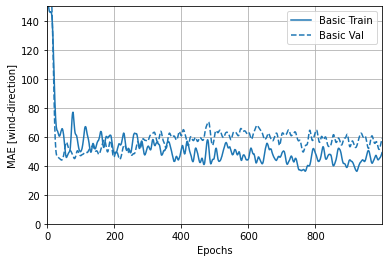

In [37]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,150])
plt.ylabel('MAE [wind-direction]')

Text(0, 0.5, 'MSE [wind-direction]')

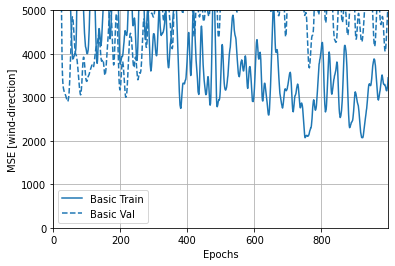

In [38]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,5000])
plt.ylabel('MSE [wind-direction]')

In [39]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 4012.9207 - mae: 50.8493 - mse: 4012.9207 - mape: 28.3983
Train set Mean Abs Error : 50.85
Train set Mean Square Error : 4012.92


In [40]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 0s - loss: 5287.1465 - mae: 59.6538 - mse: 5287.1465 - mape: 30.4340
Validation set Mean Abs Error : 59.65
Validation set Mean Square Error : 5287.15


In [41]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 4314.4121 - mae: 55.2008 - mse: 4314.4121 - mape: 32.1625
Testing set Mean Abs Error : 55.20
Testing set Mean Square Error : 4314.41


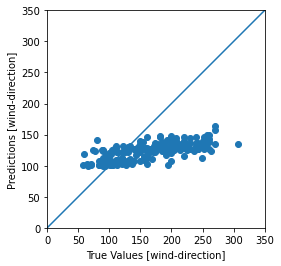

In [42]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

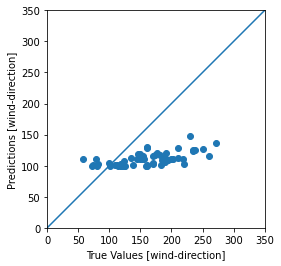

In [43]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

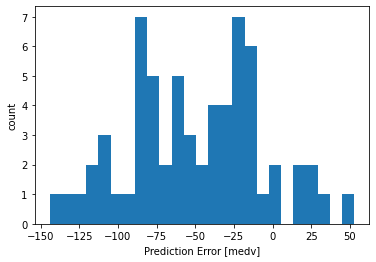

In [44]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [medv]")
_ = plt.ylabel("count")